In [1]:
import importlib.util
import sys
loc = '/afs/ciemat.es/user/m/martialc/public/muTel_v4/muTel/src/muTel/__init__.py'
# loc = r'..\..\..\src\muTel\__init__.py'
src = 'muTel'
spec = importlib.util.spec_from_file_location(src, loc)
foo = importlib.util.module_from_spec(spec)
sys.modules[src] = foo
spec.loader.exec_module(foo)
%load_ext autoreload

In [2]:
from IPython.display import display
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyarrow.parquet as pq
import pyarrow as pa
import os
from timeit import default_timer as timer
from scipy.optimize import curve_fit

import muTel.utils.meta as meta
from muTel.utils.tools import flatten_dict
from muTel.utils.units import Time

from muTel.dqm import MuData, MuEvent, MuChamber

In [3]:
mutel = MuChamber.from_preset('muTel','default','muTel')

In [4]:
muse_data = pd.read_parquet('../muses/run_588_test.parquet',engine='pyarrow')

/afs/ciemat.es/user/m/martialc/public/muTel_v4/muTel/src/muTel/dqm/classes/MuSE.py:222: RuntimeWarning: invalid value encountered in cast
  cell_diff = np.diff(2*cells).astype(int)


EventNr  GEO  hit  channel  layer  cell  TDCtime   DriftTime
sl MuSEId                                                              
1  0A            0   24    4       20      4     6     1822   969.53125
   0A            0   24    1       22      3     6     1698   872.65625
   0A            0   24    2       21      2     6     1730   897.65625
   0A            0   24    3       23      1     6     1741   906.25000
2  0B            0   24    6       76      4     4     1684   861.71875
   0B            0   24    5       78      3     4     1638   825.78125
   0B            0   24    8       77      2     4     1763   923.43750
   0B            0   24    7       79      1     4     1732   899.21875
3  0C            0   26    1       16      4     5     1719   889.06250
   0C            0   26    2       18      3     5     1762   922.65625
   0C            0   26    0       17      2     5     1632   821.09375
4  0D            0   26    3       72      4     3     1500   717.96875
   0D            0   26    6       70      3     2     1908  1036.71875
   0D            0   26    4       73      2     3     1600   796.09375
   0D            0   26    5       71      1     2     1802   953.90625

EJE X


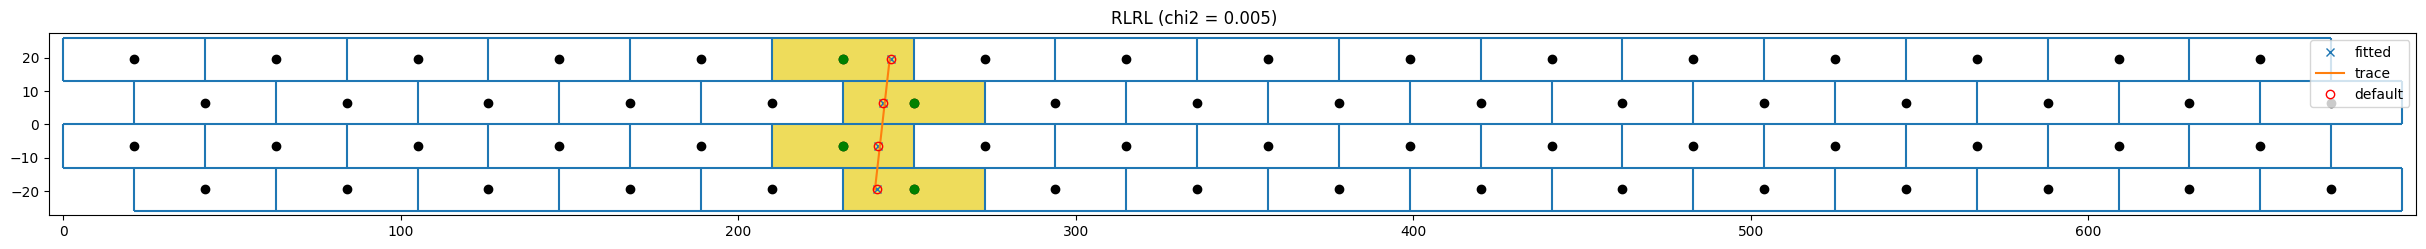

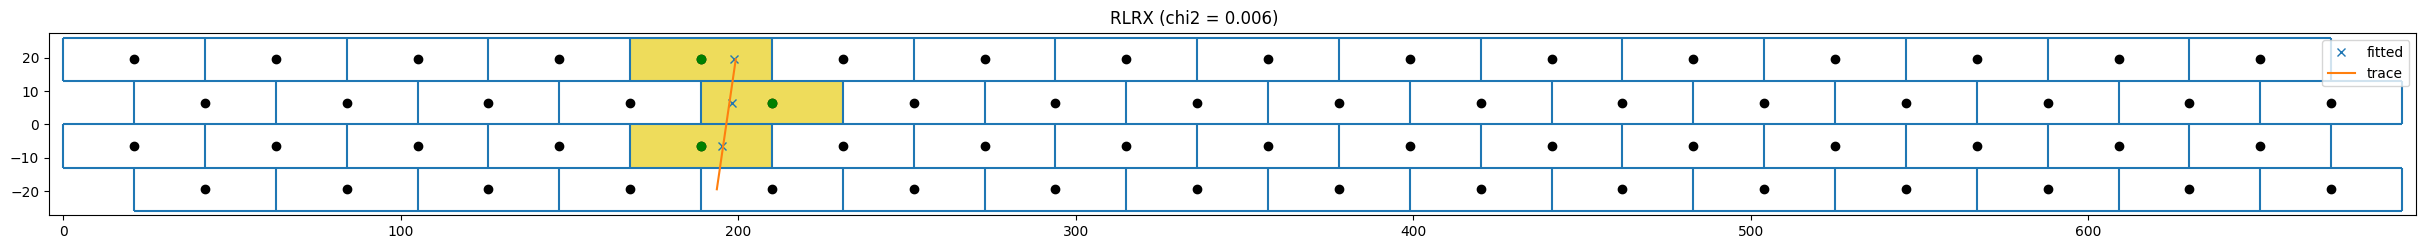

EJE Y


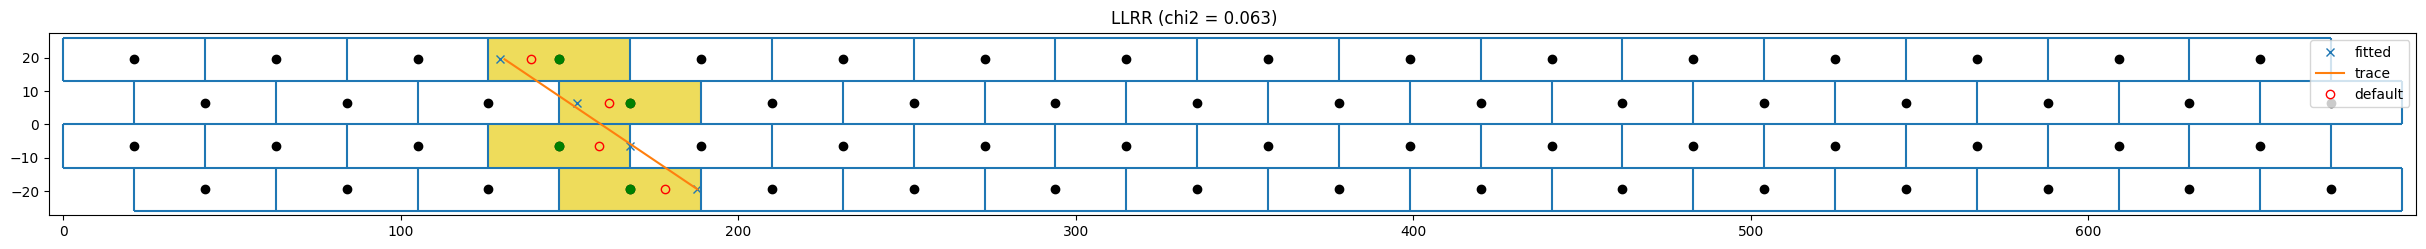

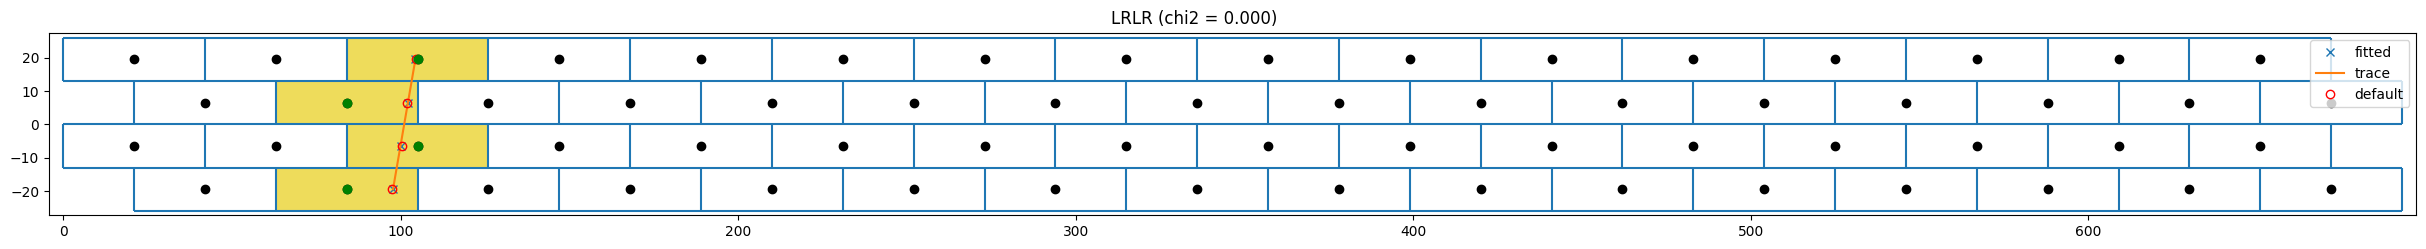

In [5]:
n_event = 0
event = MuEvent.from_musedata(muse_data[muse_data.EventNr == n_event], do_fit = True)
display(event.data.set_index(['sl','MuSEId']))
# display([muse._phi for muse in event.muses[1] + event.muses[3]])
# display([muse._phi for muse in event.muses[2] + event.muses[4]])
# display([muse._t0 for muse in event.all_muses])
# display([muse._chi2 for muse in event.all_muses])
plt.ioff()
figs_slX = [muse.fit(do_plot=True).fig.values[0] for muse in event.all_muses if (muse.nhits > 2) & (muse.sl % 2 == 1)]
figs_slY = [muse.fit(do_plot=True).fig.values[0] for muse in event.all_muses if (muse.nhits > 2) & (muse.sl % 2 == 0)]
plt.close('all')

plt.ion()
print('EJE X')
for fig in figs_slX:
    plt.figure(fig)
    plt.show()

print('EJE Y')
for fig in figs_slY:
    plt.figure(fig)
    plt.show()

phi          x0          t0  \
latID                                     
LLRR  -0.971846  159.358398  541.619318   
RLRL   0.012394  158.327148  685.165128   
RLRR  -0.483854  164.036412  691.609172   
LLRL  -0.375337  154.829241  734.522119   

                                                     res      chi2    x0_dev  \
latID                                                                          
LLRR   [-1.3964843611512094, 2.5351562545031356, -0.8...  0.062752  1.858398   
RLRL   [-1.8583984375005969, 1.8583984375013927, 1.85...  0.087253  0.827148   
RLRR   [2.5672433035686026, 9.947598300641403e-13, -7...  0.548350  6.536412   
LLRL   [-7.14174112667996, 10.71261160464789, -4.5270...  1.178758 -2.670759   

           t0_dev                      fig  
latID                                       
LLRR  -168.380682  Figure(3054.55x236.364)  
RLRL   -24.834872  Figure(3054.55x236.364)  
RLRR   -18.390828  Figure(3054.55x236.364)  
LLRL    24.522119  Figure(3054.55x236.364)

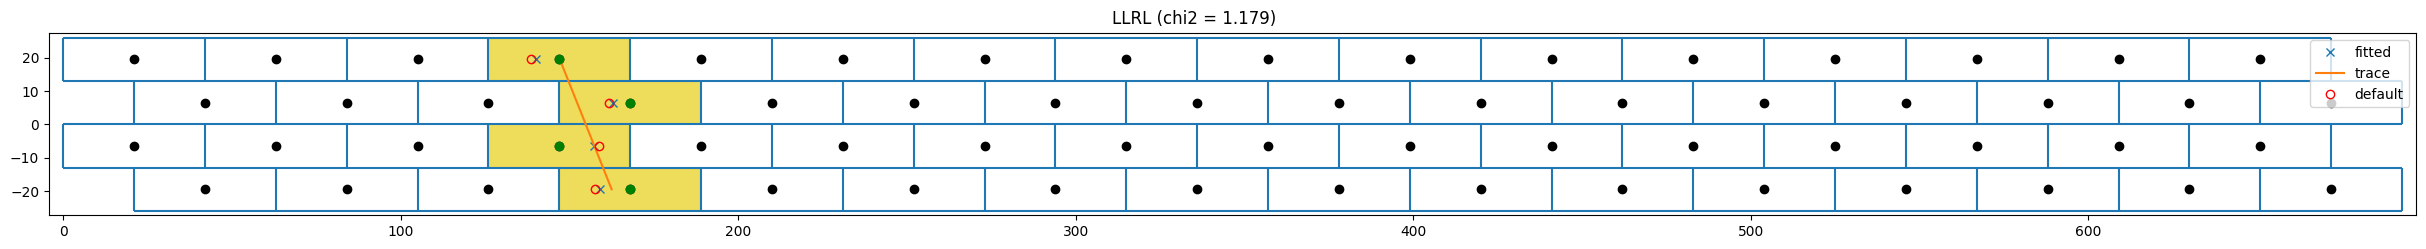

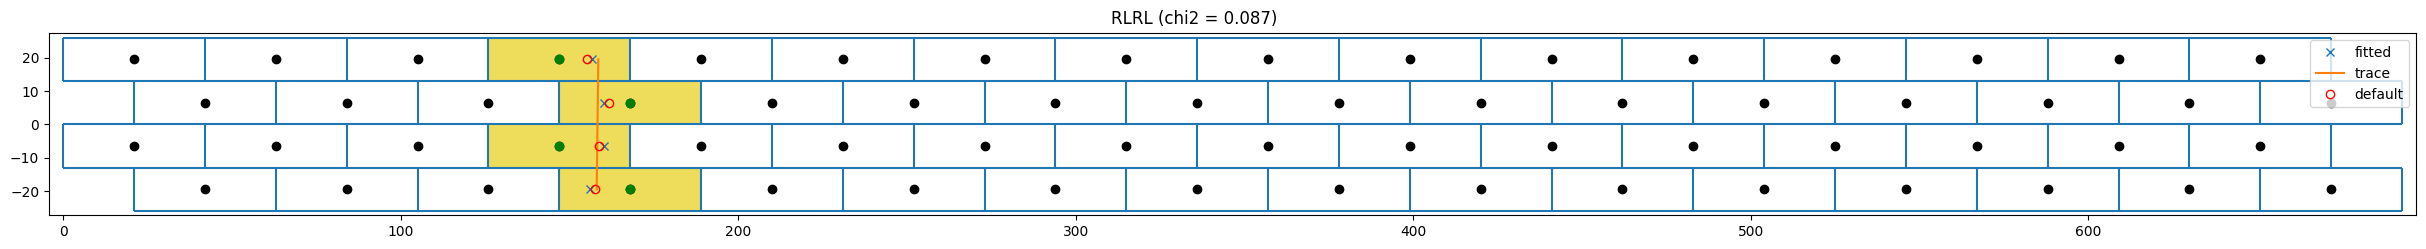

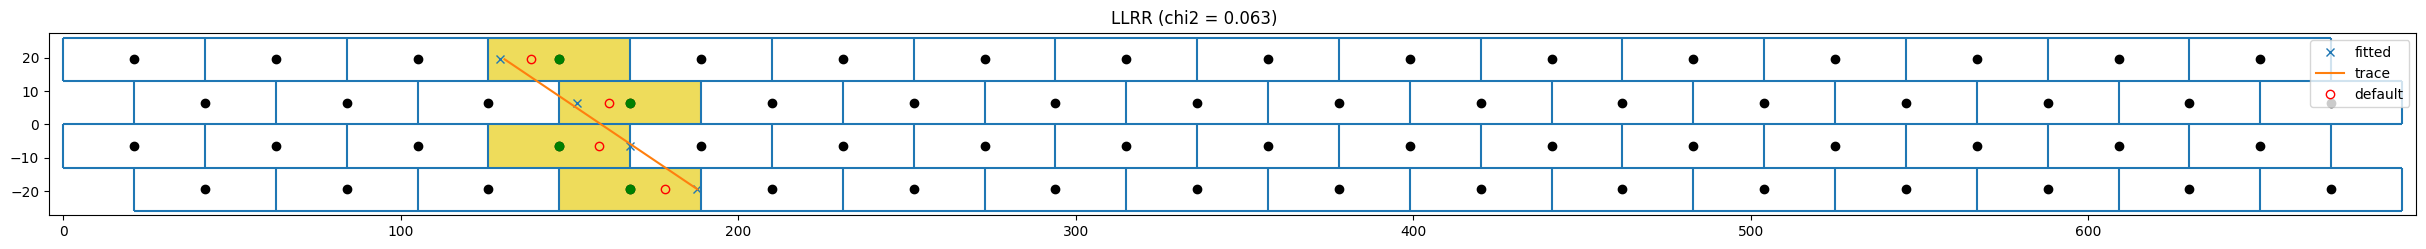

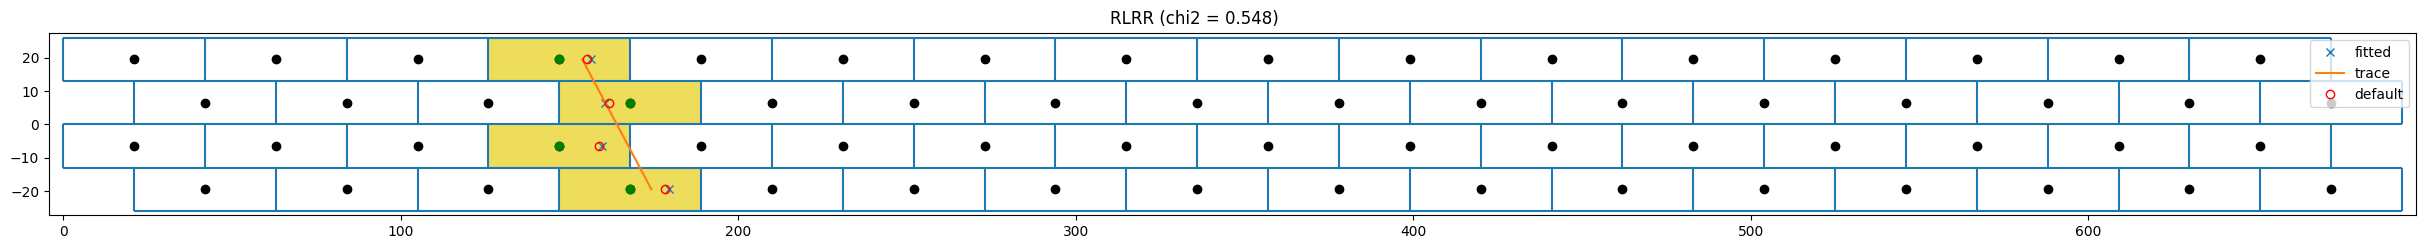

In [6]:
event.muses[2][0].fit(do_plot=True)